In [3]:
using Plots
using LinearAlgebra
using Statistics
include("./ffnnModule.jl")
using .basicNeuralNetwork


┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
│   exception = ErrorException("Required dependency WoodburyMatrices [efce3f68-66dc-5838-9240-27a6d6f5f9b6] failed to load from a cache file.")
└ @ Base loading.jl:1992


┌ Warning: The call to compilecache failed to create a usable precompiled cache file for ImageTransformations [02fcd773-0e25-5acc-982a-7f6622650795]
│   exception = ErrorException("Required dependency WoodburyMatrices [efce3f68-66dc-5838-9240-27a6d6f5f9b6] failed to load from a cache file.")
└ @ Base loading.jl:1992


┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
│   exception = ErrorException("Required dependency WoodburyMatrices [efce3f68-66dc-5838-9240-27a6d6f5f9b6] failed to load from a cache file.")
└ @ Base loading.jl:1992


┌ Warning: The call to compilecache failed to create a usable precompiled cache file for WoodburyMatrices [efce3f68-66dc-5838-9240-27a6d6f5f9b6]
│   exception = ErrorException("Error reading package image file.")
└ @ Base loading.jl:1992


┌ Warning: Module WoodburyMatrices with build ID ffffffff-ffff-ffff-0000-296fc8463c71 is missing from the cache.
│ This may mean WoodburyMatrices [efce3f68-66dc-5838-9240-27a6d6f5f9b6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948


┌ Warning: Module ImageTransformations with build ID ffffffff-ffff-ffff-0000-296f25ae9178 is missing from the cache.
│ This may mean ImageTransformations [02fcd773-0e25-5acc-982a-7f6622650795] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948


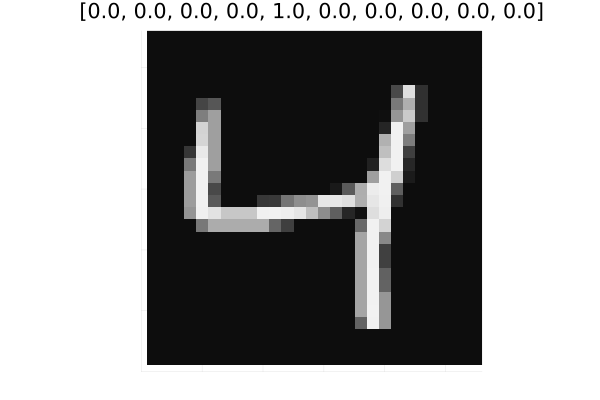

In [52]:
idx = 3
plot_ubyte_image("./mnist/train-images.idx3-ubyte", idx)
labels = read_mnist_labels("./mnist/train-labels.idx1-ubyte")
plot!(title=labels[:,idx])

# Experimental pass

*only for checking basic functionalities*

In [4]:
input = Vector{Float64}([1.0,1.1,2.1,0.2,0,0])
label = Vector{Float64}([1,0])
input2 = Vector{Float64}([0,0,1.4,1.2,0,0])
label2 = Vector{Float64}([1,0])

layer1 = DenseLayer(6, 8, relu, relu_derivative)
layer2 = DenseLayer(8, 8, relu, relu_derivative)
layer3 = DenseLayer(8, 2, softmax, softmax_derivative)

layers = Vector([layer1,layer2,layer3])

#relu isn't fit for such small networks, also not in every single layer.

network = NeuralNetwork(layer1,layer2,layer3)
output = forward_pass(network, input)

2-element Vector{Float64}:
 0.34360184612529615
 0.6563981538747039

In [5]:
println("$output\n$label")
#cost function interface
sq = CrossEntropy()
cost_before = cost(sq, output, label)
println("\tcost before: $cost_before")
costs = []
gradients = NaN
for i in 1:1000
    output = forward_pass(network, input)
    singular_cost = cost(sq,output,label)
    #breaks on nan output
    if isnan(singular_cost) changing_weights(network, .-gradients, Float64(0.0001)), println("cost has NaN value, returning to previous state"); break; end

    gradients = backpropagation_pass(network, output, label, sq)
    changing_weights(network, gradients, Float64(0.0001))
    push!(costs, cost(sq,output,label))
end

cost_after = cost(sq, forward_pass(network, input), label)
println("\tcost after: $cost_after")
println("$output")
#gradients and weights have different sizes, idk why. All gradients are square matrices, which is completely wrong
# I suppose I am treating delta_l with a_l instead of a_l-1, so I ought to include a_1=input

[0.34360184612529615, 0.6563981538747039]
[1.0, 0.0]


	cost before: 1.0682717159927102


	cost after: 0.06468265598033159
[0.9371702712906913, 0.06282972870930872]


[0.9371702712906913, 0.06282972870930872]
[1.0, 0.0]


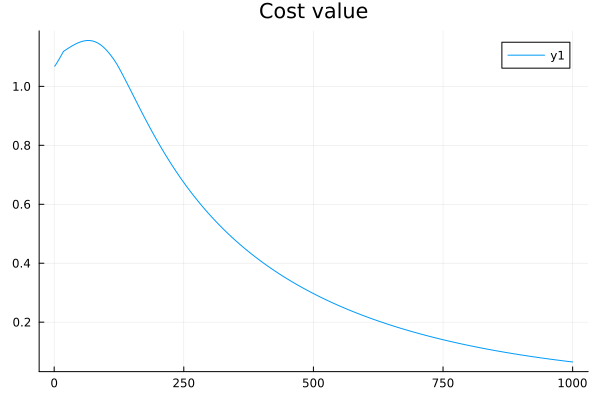

In [6]:
println("$output\n$label")
plot(costs, title="Cost value")


# MNIST training

*propper training on MNIST dataset, though slow with used code*

In [7]:

num_of_epochs = 5
batch_size = 10
images = read_ubyte_images("./mnist/train-images.idx3-ubyte")
labels = read_mnist_labels("./mnist/train-labels.idx1-ubyte")
image_batches, label_batches = create_batches_with_labels(images, labels, batch_size)

costs = []
outputs = []
output = false

#sq = SquareCost()
sq = CrossEntropy()

# sprawdzić rózne ilości neuronów
layer1 = DenseLayer(784, 256, relu, relu_derivative)
layer2 = DenseLayer(256, 128, relu, relu_derivative)
layer3 = DenseLayer(128, 10, softmax, softmax_derivative)

network = NeuralNetwork(layer1,layer2,layer3)


NeuralNetwork(DenseLayer[DenseLayer([0.02211614254960104 0.026813001697648702 … 0.045068477733472216 0.03995444777412283; 0.064308243387938 -0.05716016048400274 … 0.006273667931119188 -0.08280050008405904; … ; 0.05729090946079696 -0.03558179644865765 … 0.020725663260039315 0.02792695971305243; 0.03813159865029974 0.03372697126667016 … -0.0179004154953175 0.01591410069948336], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Main.basicNeuralNetwork.relu, Main.basicNeuralNetwork.relu_derivative), DenseLayer([0.06846518472202881 -0.06631166416242594 … -0.019709102994757893 0.09112361023898843; -0.10008604731540807 -0.08790935416747182 … 0.04515311338841156 -0.12872491085293003; … ; 0.15291923023290963 0.016744315089953426 … -0.016761544297431978 0.043813387150905325; 0.057096491932844516 0.26408910555377335 … 0.17905633008335667 -0.08969598925559248], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [18]:
learning_rate = Float64(0.001) #learning rate varying based on cost time changes could be beneficial
#too small learning rate (eg 0.00001 for 1 element batch) leads tofast increase of cost function to infinity... I don't yet know why.
#training

#after each epoch or couple of some number of training steps model should be saved to prevent overfitting and hitting NaN value (though this should be really a problem only for small dataset)

#strangely, with softmax and softmax_derivative applied as here, the mean gradient should be taken with minus sign (which doesn't really add up with "experimental" implementation). Moreover taking minus only ensures stable point at 2.3... which is highly suboptimal. Probably softmax/softmax derivative is to blame.

#for the necessary step - I'll need to ensure proper convergence for 1 output 1 input case.

learning_rates = [1e-5, 3.4e-4, 6.7e-4, 1e-3, 9.5e-4]

for epoch in 1:num_of_epochs
    learning_rate = learning_rates[epoch]
    iteration_number = 0
    for (image_batch, label_batch) in zip(image_batches, label_batches)
        #temporary change, needs to be taken out
        #image_batch = image_batches[1]
        #label_batch = label_batches[1]
        
        costs_temp = []
        image = NaN

        mean_gradient = [zeros(size(l.weights)) for l in network.layers]

        for j in 1:batch_size
            image = image_batch[:,j]
            label = label_batch[:,j]
            output = forward_pass(network, image)
            gradients = backpropagation_pass(network, output, label, sq)
            push!(outputs, output)
            push!(costs_temp, cost(sq,output,label))

            for (i, g) in enumerate(gradients)
                mean_gradient[i] .+= g
            end
        end
        
        for g in 1:size(mean_gradient,1)
            #normalization to 1 is crucial
            mean_gradient[g] = normalize_matrix_to_one(mean_gradient[g])
            #mean_gradient[g] ./= batch_size
        end

        changing_weights(network, mean_gradient, learning_rate)
        push!(costs,mean(costs_temp))
        iteration_number += 1
        if mod(iteration_number,200)==0 #useful only for debugging, shortens time needed
            println("iteration $iteration_number  ;  ")
        end
        #ensures that there will be no NAN values from calculation errors
        if costs[end]<=0.001
            println("iteration $iteration_number  ; finished with cost $(costs[end]) ")
            error("no error")
        end
        #test check, very inefficient
        if any(isnan, forward_pass(network, image))
            error("found NaN in output!")
        end
    end
    println("\tepoch $epoch finished\n\tcost: $(mean(costs[end-10:end])) \noutput: $(forward_pass(network, image_batches[1][:,1]))\nlabel: $(label_batches[1][:,1])")
        
end
# something strange happened and weights do not change.

iteration 200  ;  


iteration 400  ;  


iteration 600  ;  


iteration 800  ;  


iteration 1000  ;  


iteration 1200  ;  


iteration 1400  ;  


iteration 1600  ;  


iteration 1800  ;  


iteration 2000  ;  


iteration 2200  ;  


iteration 2400  ;  


iteration 2600  ;  


iteration 2800  ;  


InterruptException: InterruptException:

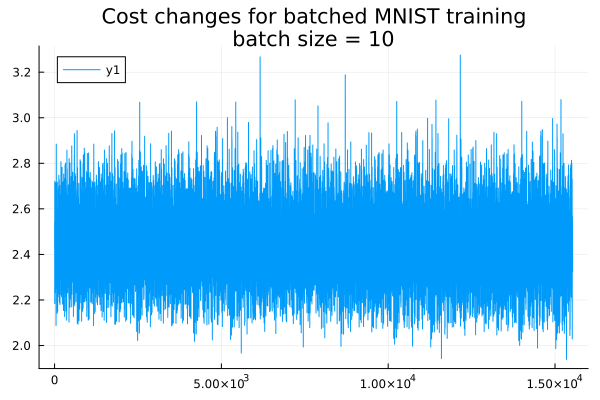

In [19]:
plot(costs,title="Cost changes for batched MNIST training\nbatch size = $batch_size")
#there is some problem in calculating cost and gradients (probably within derivative definitions) which makes them very unstably for low error values (and misteriously low training rate values), it seems that something isn't properly normalized. I tweaked mostly softmax derivative, check it I must.

# At least predictions for one output work as expected.

In [20]:
println(mean(costs[1:2000]))
println(mean(costs[end-2000,end]))

2.455404015348812
2.576467682073519


In [92]:
image = image_batches[1][:,1]
label = label_batches[1][:,1]
output = forward_pass(network, image)

cor_output = label.+output/100
cor_output ./= sum(cor_output)

println(cost(sq, cor_output,label))

println(label)
println(output)

println("do zrobienia to samo na reduced mnist 8x8")

#now we're getting problem with nans, I don't like that
#0.008950830520084446

0.005848082759275857
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.009253265398577258, 0.41106738301422885, 0.059232840584118616, 0.1314020176224826, 0.0501511573332311, 0.07694027245002012, 0.050790313501179164, 0.12541755335859733, 0.04355173348423179, 0.042193463253333036]


# XOR and multidimentional XOR network implementation

# Optdigits dataset

In [1]:
using Plots
using LinearAlgebra
using Statistics
include("./ffnnModule.jl")
using .basicNeuralNetwork

In [19]:

#reading and batching
batch_size = 64

train_file_path = "./mnist_red/optdigits.tra"
test_file_path = "./mnist_red/optdigits.tes"

feature_batches, label_batches = optdigits_data_processing(train_file_path, batch_size=batch_size)
test_features, test_labels = optdigits_data_processing(train_file_path, do_batch=false)


#variables for visualization
costs = []
accuracy = []
outputs = []
output = false
mean_gradient = NaN

#cost function definition:
sq = CrossEntropy()

#layers, nonlinearities and their derivatives
layer1 = DenseLayer(64, 128, relu, relu_derivative, true)
layer2 = DenseLayer(128, 64, relu, relu_derivative, true)
layer3 = DenseLayer(64,10, softmax, softmax_derivative)

network = NeuralNetwork(layer1,layer2,layer3)

ADAM_Optimizer([[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], 0.9, [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], 0.999)

In [20]:
num_of_epochs = 5
learning_rate = Float64(0.1)


#for right learning rates it clearly learns well, further learning requires direct optimization using for example ADAM algorithm
#learning_rates = [0.5, 0.2, 0.08, 0.05, 0.05]
timestep = 1
#optim = ADAM_Optimizer(network)

#optimization algorithm - simple subtract uses non, adam is currently a little faulty
optim = Simple_Subtract()
for epoch in 1:num_of_epochs
    feature_batches, label_batches = optdigits_data_processing(train_file_path, batch_size=batch_size)
    
    for (feature_batch, label_batch) in zip(feature_batches, label_batches)

        costs_temp = []
        accuracy_temp = []
        image = NaN

        mean_gradient = [zeros(size(l.weights)) for l in network.layers]

        for j in 1:batch_size
            image = feature_batch[j, :]
            label = label_batch[j, :]
            output = forward_pass(network, image)

            #gradients is a vector of matrices, biases are kept constant
            gradients = backpropagation_pass(network, output, label, sq)
            push!(outputs, output)
            push!(costs_temp, cost(sq,output,label))
            
            if argmax(output)==argmax(label)
                push!(accuracy_temp,1)
            else
                push!(accuracy_temp,0)
            end
            
                #slow, but necessary (placeholder for better code)
            for (i, g) in enumerate(gradients)
                if any(isnan, g)
                    error("found NaN in g")
                end
                mean_gradient[i] .+= g/batch_size
            end
        end
        
        for g in 1:size(mean_gradient,1)
            #gradients become very large (rarely, but sometimes even infinite), normalization below is crucial
            mean_gradient[g] = normalize_matrix_to_one(mean_gradient[g])
            if any(isnan, mean_gradient[g])
                error("found NaN in gradient")
            end
        end

        changing_weights(optim, network, mean_gradient, learning_rate, timestep)
        push!(costs,costs_temp[end])
        push!(accuracy,sum(accuracy_temp)/batch_size)
        timestep += 1
        
        if costs[end]<=0.001
            println("epoch $epoch ; iteration $timestep  ; finished with cost $(costs[end]) ")
            error("no error")
        end
        
        #inefficient but unimportant for this dataset
        
    end
    #printing debugging data
    if mod(epoch,10)==0
        println("\tepoch $epoch finished\n\tcost: $(round(mean(costs[end-100:end]), digits=3)) \noutput: $(round.(forward_pass(network, feature_batches[1][1,:]), digits=3))\nlabel: $(round.(label_batches[1][1,:], digits=3))")
    end
end

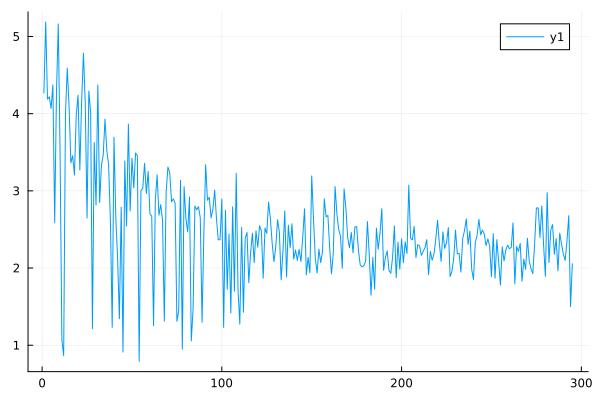

In [21]:
plot(costs)

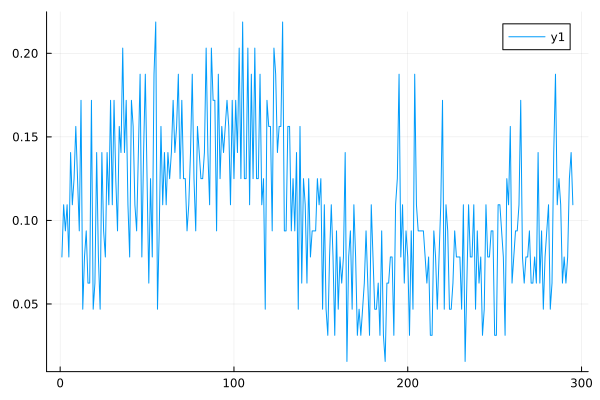

In [22]:
plot(accuracy)